<a href="https://colab.research.google.com/github/eric-orenge/ML-House-Price-Prediction/blob/master/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  

User uploaded file "test.csv" with length 451405 bytes
User uploaded file "train.csv" with length 460676 bytes


In [0]:
# see a few records
import io
import pandas as pd
df_train = pd.read_csv(io.StringIO(uploaded["train.csv"].decode("utf-8")))
print(df_train.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [0]:
# for the test dataset
df_test = pd.read_csv(io.StringIO(uploaded["test.csv"].decode("utf-8")))
print(df_test.head())

     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]


In [0]:
#How many missing values?
missing_count = (df_train.isnull().sum() / len(df_train)) * 100
#filter to find missing_count > 0
missing_count = missing_count[missing_count > 0]

print(missing_count.sort_values())

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


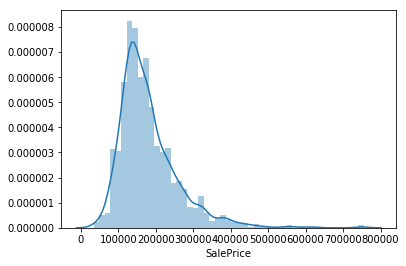

In [0]:
# we need to handle the missing columns
import seaborn as sns
sns.distplot(df_train['SalePrice'])
# right skewed

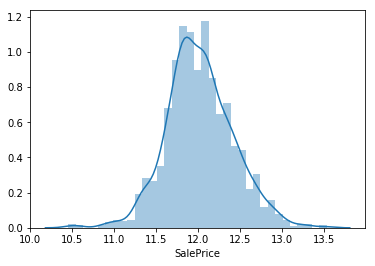

In [0]:
# most ML works with normally distributed data.
# Transform the target SalePrice variable by taking log scale
import numpy as np
target = np.log(df_train['SalePrice'])
sns.distplot(target)

In [0]:
# finding numerical features
numerical_data = df_train.select_dtypes(include = [np.number])
# finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in this dataset'.\
     format(numerical_data.shape[1], categorical_data.shape[1]))

There are 38 numerical and 43 categorical features in this dataset


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

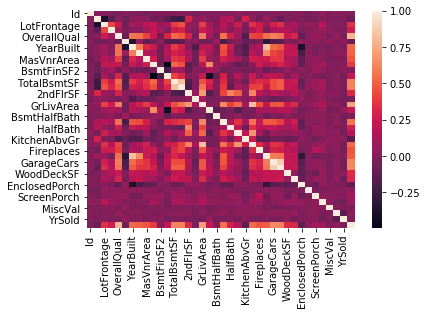

In [0]:
#correlation of numerical features
corr = numerical_data.corr()
sns.heatmap(corr)
# remove Id from numerical data
#del numerical_data['Id']
numerical_data.columns

In [0]:
# correlation analysis for the categorical data


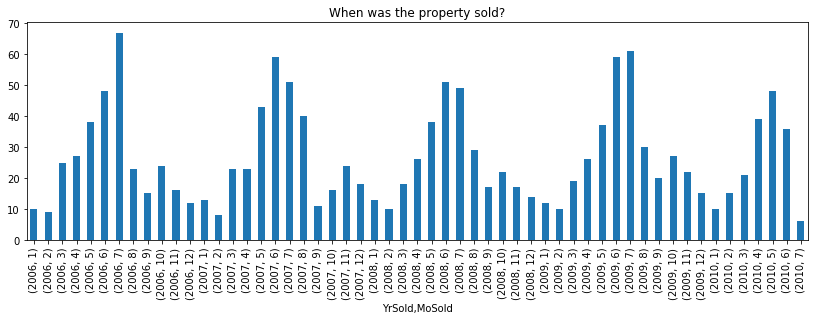

In [0]:
# when was the property sold in which year and month
import matplotlib.pyplot as plt
%matplotlib inline

df_train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize = (14,4))
plt.title("When was the property sold?")
plt.show()

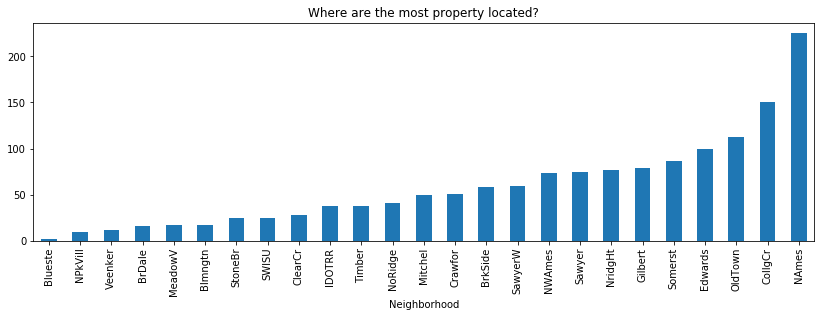

In [0]:
# Neighborhood
df_train.groupby(['Neighborhood']).Id.count().sort_values().plot(kind='bar', figsize = (14,4))
plt.title("Where are the most property located?")
plt.show()

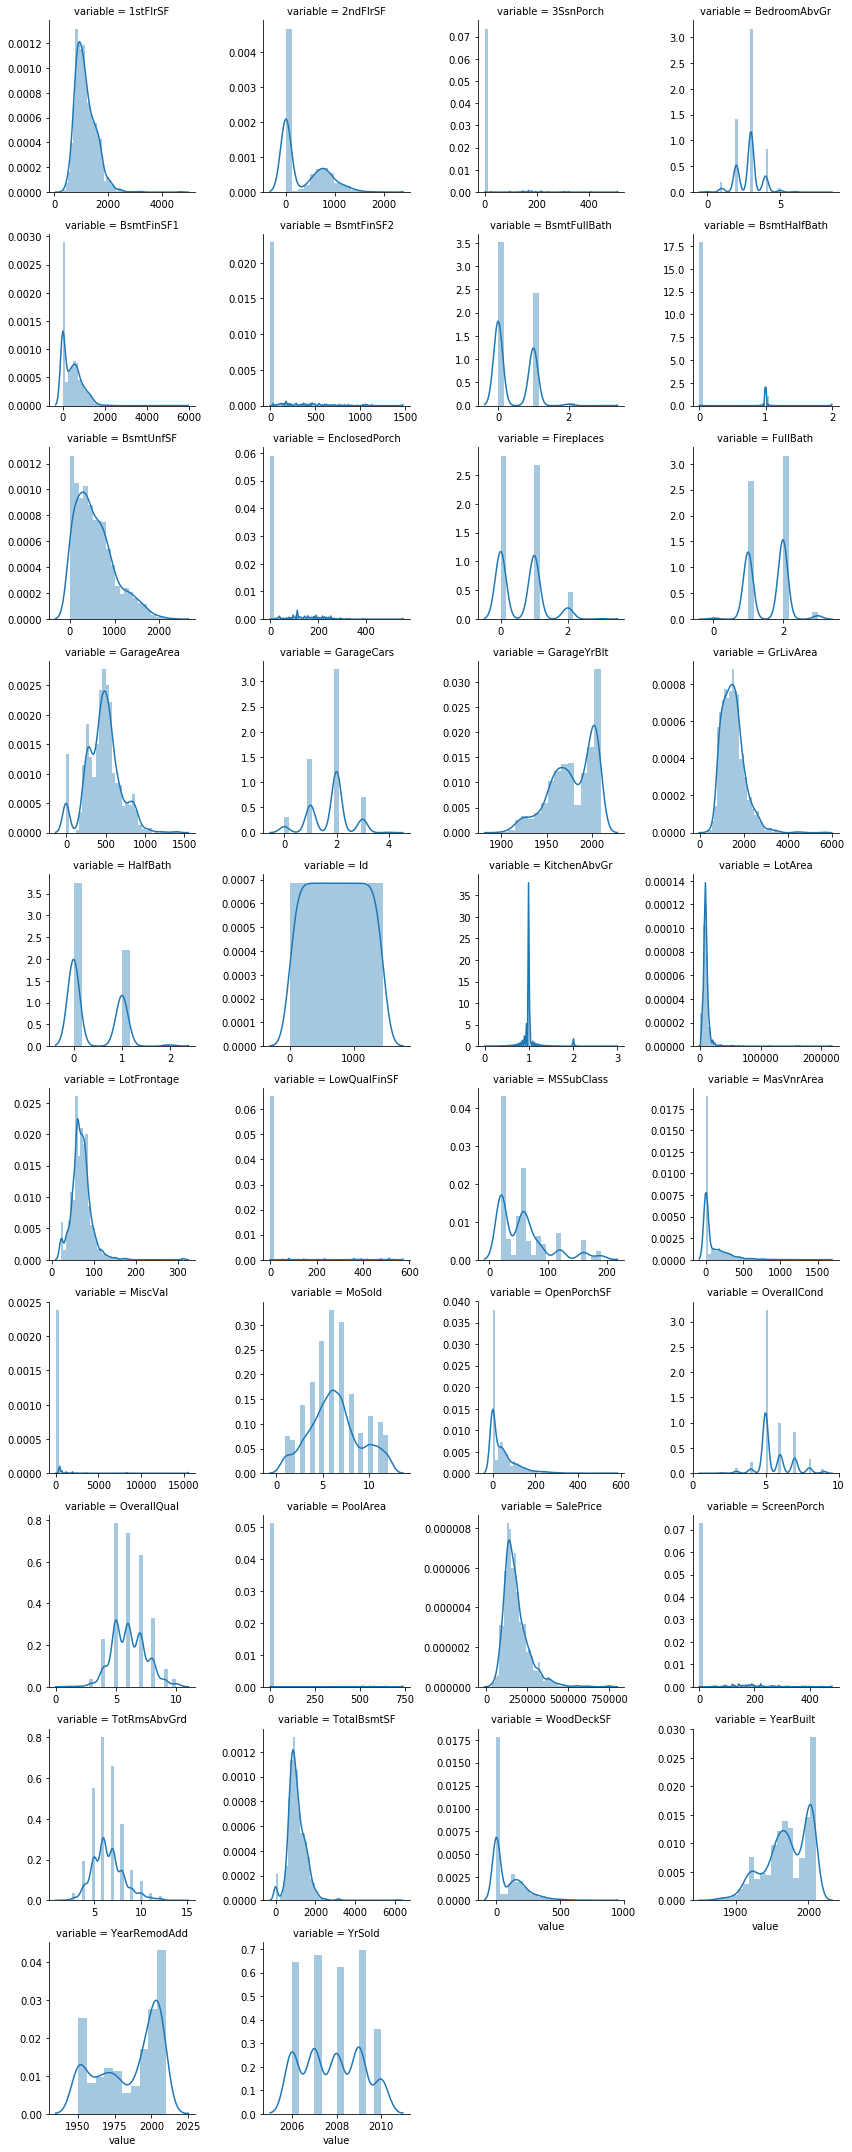

In [0]:
# distribution of numerical features

f = pd.melt(df_train,value_vars=sorted(numerical_data))
g = sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
g.map(sns.distplot,'value')

In [0]:
# Conversion from numerical to categorical features.
df_train['MSSubClass'] = df_train.MSSubClass.apply(lambda x: str(x))
df_train['YrSold'] = df_train.YrSold.apply(lambda x: str(x))
df_train['MoSold'] = df_train.MoSold.apply(lambda x: str(x))

In [0]:
# finding numerical features
numerical_data = df_train.select_dtypes(include = [np.number])
# finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in this dataset'.\
     format(numerical_data.shape[1], categorical_data.shape[1]))

There are 35 numerical and 46 categorical features in this dataset


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


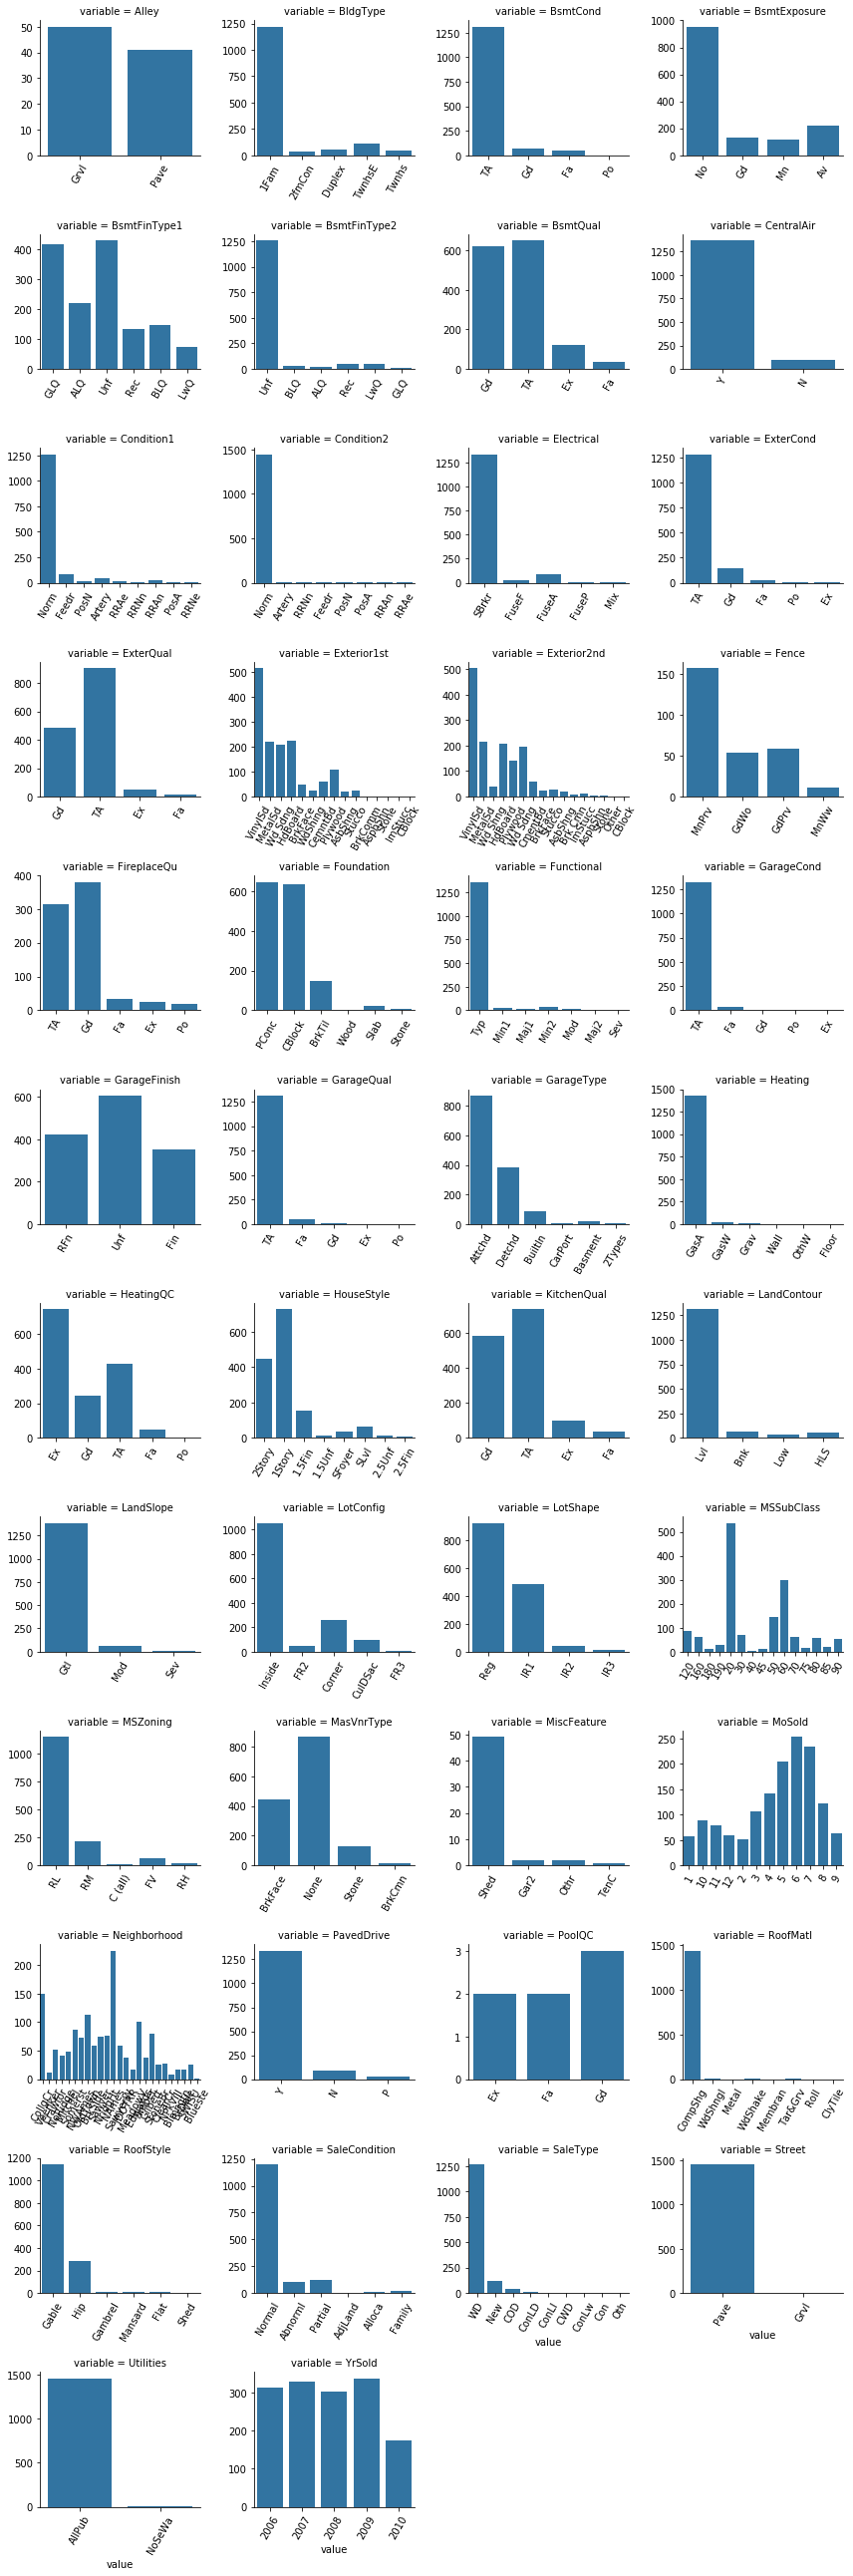

In [0]:
# plot count of categorical features
f = pd.melt(df_train,value_vars = sorted(categorical_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
plt.xticks(rotation="vertical")
g = g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [0]:
# know what the categorical data respresent
# convert categorical data to numerical data
df_train.Alley.replace({'Grvl':1,'Pave':2},inplace=True)
#df_train['Alley'].unique()
df_train.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4},inplace=True)
#df_train.LotShape.replace({'1Fam':1,'2fmCon':2,'Duplex':3,'TwnhsE':4,'Twnhs':5},inplace=True)
df_train.LandContour.replace({'Low':1,'HLS':2,'Bnk':3,'Lvl':4},inplace=True)
df_train.Utilities.replace({'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4},inplace=True)
df_train.LandSlope.replace({'Sev':1,'Mod':2,'Gtl':3},inplace=True)
df_train.ExterQual.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
df_train.ExterCond.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
df_train.BsmtCond.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
df_train.BsmtQual.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
df_train.BsmtExposure.replace({'No':1,'Mn':2,'Av':3,'Gd':4},inplace=True)
df_train.BsmtFinType1.replace({'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},inplace=True)
df_train.BsmtFinType2.replace({'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},inplace=True)
df_train.HeatingQC.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
df_train.KitchenQual.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
df_train.Functional.replace({'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8},inplace=True)
df_train.FireplaceQu.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
df_train.GarageFinish.replace({'Unf':1,'RFn':2,'Fin':3},inplace=True)
df_train.GarageQual.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
df_train.GarageCond.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
df_train.PavedDrive.replace({'N':1,'P':2,'Y':3},inplace=True)
df_train.PoolQC.replace({'Fa':1,'TA':2,'Gd':3,'Ex':4},inplace=True)

In [0]:
cat_to_num_features = ["Alley","LotShape","LandContour","Utilities","LandSlope"
                       ,"ExterQual","ExterCond","BsmtCond","BsmtQual","BsmtExposure","BsmtFinType1"
                       ,"BsmtFinType2","HeatingQC","KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC"]
df_train[cat_to_num_features] = df_train[cat_to_num_features].fillna(0)

In [0]:
# finding numerical features
numerical_data = df_train.select_dtypes(include = [np.number])
# finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in this dataset'.\
     format(numerical_data.shape[1], categorical_data.shape[1]))

There are 56 numerical and 25 categorical features in this dataset


In [0]:
# box plot to analyse the means of categorical features
# Null hypothesis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


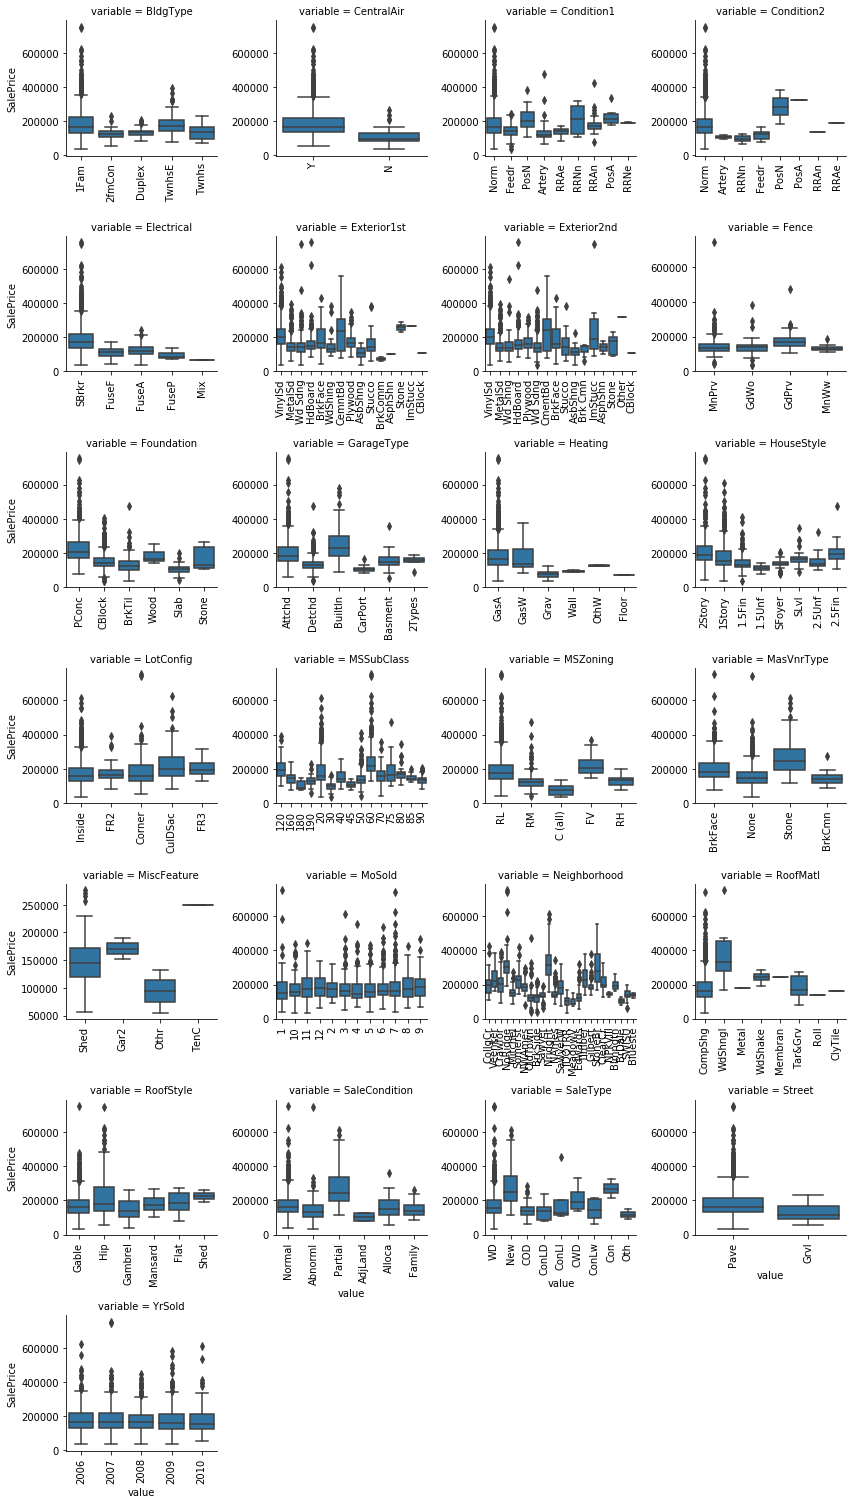

In [0]:
# count plot of historical features
f = pd.melt(df_train,id_vars = ['SalePrice'], value_vars = sorted(categorical_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
g = g.map(sns.boxplot,'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(),rotation = 90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [0]:
import scipy.stats
cat_features = categorical_data.columns
df_train[cat_features] = df_train[cat_features].fillna('Missing') # anova method cannot run with null values
anova = {'feature':[],'f':[],'p':[]}
for cat in cat_features:
  group_price = []
  for group in df_train[cat].unique():
    group_price.append(df_train[df_train[cat] == group]['SalePrice'].values)
  f, p = scipy.stats.f_oneway(*group_price)
  anova['feature'].append(cat)
  anova['f'].append(f)
  anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

#p < 0.05 is significant, dependent on f. if p < 0.05 recheck the null hypothesis
# null hypothesis is the categorical features have no huge difference among each other while contributing to the sale price

#p > 0.05 we will not be able to accept or conclude the null hypothesis

In [0]:
anova

,feature,f,p
4,Neighborhood,71.784865,1.558600e-225
14,Foundation,100.253851,5.791895e-91
18,GarageType,80.379992,6.117026e-87
0,MSSubClass,33.732076,8.662166e-79
13,MasVnrType,84.672201,1.054025e-64
24,SaleCondition,45.578428,7.988268e-44
11,Exterior1st,18.611743,2.586089e-43
12,Exterior2nd,17.500840,4.842186e-43
23,SaleType,28.863054,5.039767e-42
1,MSZoning,43.840282,8.817634e-35


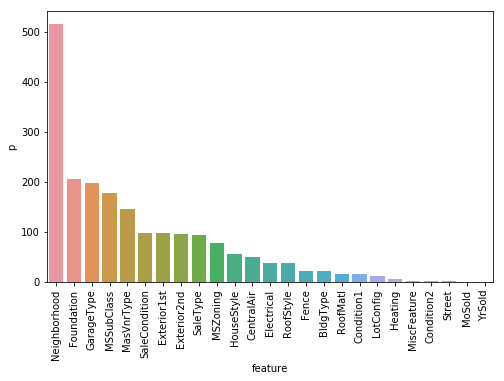

In [0]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature, np.log(1./anova['p']))# inverse plot. smaller values will come up
plt.xticks(rotation=90)
plt.show()

In [0]:
# adhoc
# filling missing values categorical features
missing_values = (df_train[cat_features] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

df_train.loc[df_train.Electrical == 'Missing', 'Electrical'] = df_train.Electrical.mode()[0]

MiscFeature    1406
Fence          1179
GarageType       81
MasVnrType        8
Electrical        1
dtype: int64

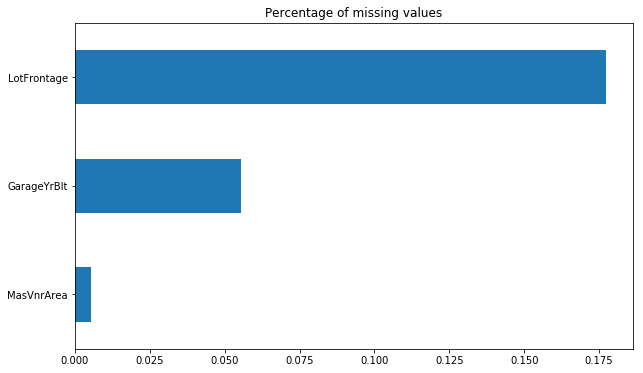

In [0]:
# for all the data
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data[missing_data > 0].\
  sort_values(ascending=True).\
  plot(kind='barh',figsize=(10,6))
plt.title("Percentage of missing values")
plt.show()

In [0]:
# How can there be no street in front of the lot? Hence fill with a median value
df_train.LotFrontage = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
df_train.GarageYrBlt.fillna(0,inplace = True)
df_train.MasVnrArea.fillna(0,inplace = True)

In [0]:
#Looking into MasVnrType
#Correct assignment
df_train.MasVnrType.replace({'Missing':'None'},inplace=True)
#replace with mean
df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' # Most common
df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea == 1), 'MasVnrType'] = 0 # 1 sqr ft is basically zero
for vnr_type in df_train.MasVnrType.unique():
  df_train.loc[(df_train.MasVnrType == vnr_type) & (df_train.MasVnrArea == 0),'MasVnrArea'] = \
    df_train[df_train.MasVnrType == vnr_type].MasVnrArea.mean()
  
  


In [0]:
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
                ... 
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [148]:
# check duplicates
print('Duplicated ids train dataset {}'.format(df_train.duplicated('Id').sum()))
print('Duplicated ids test dataset {}'.format(df_test.duplicated('Id').sum()))

# skew and non skew

Duplicated ids train dataset 0
Duplicated ids test dataset 0


In [0]:
df_train.drop(df_train[df_train.GrLivArea > 4000].index, inplace=True)

In [0]:
df_train['TotalSF'] = df_train.TotalBsmtSF + df_train.GrLivArea
df_train['TotalFloorSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalPorchSF'] = df_train.OpenPorchSF + df_train.EnclosedPorch + \
  df_train['3SsnPorch'] + df_train['ScreenPorch']

In [0]:
# create some boolean features yes/no
df_train['HasBasement']  = df_train.TotalBsmtSF.apply(lambda x : 1 if x > 0 else 0)
df_train['HasGarage']  = df_train.GarageArea.apply(lambda x : 1 if x > 0 else 0)
df_train['HasPorch']  = df_train.TotalPorchSF.apply(lambda x : 1 if x > 0 else 0)
df_train['HasPool']  = df_train.PoolArea.apply(lambda x : 1 if x > 0 else 0)
df_train['IsNew']  = (df_train.YearBuilt > 2000).astype(np.int64)
df_train['WasCompleted']  = (df_train.SaleCondition != 'Partial').astype(np.int64)

In [0]:
boolean_features = ['HasBasement','HasGarage','HasPorch','HasPool','IsNew','WasCompleted']

In [156]:
# finding numerical features
numerical_data = df_train.select_dtypes(include = [np.number])
# finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in this dataset'.\
     format(numerical_data.shape[1], categorical_data.shape[1]))

num_features = numerical_data.columns
cat_features = categorical_data.columns

There are 65 numerical and 25 categorical features in this dataset


In [0]:
num_features = [f for f in num_features if f not in boolean_features] #filter the boolean features

In [0]:
#Total bathrooms in the property
df_train['TotalBathrooms'] = df_train.FullBath + .5*df_train.HalfBath + \
  df_train.BsmtFullBath + .5*df_train.BsmtHalfBath

In [160]:
# finding numerical features
numerical_data = df_train.select_dtypes(include = [np.number])
# finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in this dataset'.\
     format(numerical_data.shape[1], categorical_data.shape[1]))

num_features = numerical_data.columns
cat_features = categorical_data.columns
num_features = [f for f in num_features if f not in boolean_features]

There are 66 numerical and 25 categorical features in this dataset


In [0]:
#Log Transformation for the features
features=num_features+['SalePrice']
for f in features:
  df_train.loc[:,f]=np.log1p(df_train[f])

In [0]:
y=df_train['SalePrice']
df_train.drop('SalePrice', axis=1,inplace=True)
df_train.drop('Id', axis=1,inplace=True)

#getdummies one hot encoding method
model_data = pd.get_dummies(df_train).copy()

In [163]:
model_data.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,...,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,0.0,0.693147,1.609438,1.609438,1.386294,2.079442,1.791759,7.602900,7.602900,5.283204,1.609438,1.386294,1.609438,1.386294,0.693147,1.945910,6.561031,0.693147,0.0,5.017280,6.753438,1.791759,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.609438,2.197225,2.197225,0.000000,0.000000,7.602900,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,0.0,0.693147,1.609438,1.609438,1.386294,1.945910,2.197225,7.589336,7.589336,0.000000,1.386294,1.386294,1.609438,1.386294,1.609438,1.791759,6.886532,0.693147,0.0,5.652489,7.141245,1.791759,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.386294,1.945910,2.197225,0.693147,1.386294,7.589336,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,0.0,1.098612,1.609438,1.609438,1.386294,2.079442,1.791759,7.601902,7.602401,5.093750,1.609438,1.386294,1.609438,1.386294,1.098612,1.945910,6.188264,0.693147,0.0,6.075346,6.825460,1.791759,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.609438,1.945910,2.197225,0.693147,1.386294,7.601902,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,0.0,1.098612,1.609438,1.609438,1.386294,2.079442,1.791759,7.557995,7.586296,0.000000,1.386294,1.386294,1.386294,1.609438,0.693147,1.791759,5.379897,0.693147,0.0,6.293419,6.629363,1.609438,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,1.609438,2.079442,2.197225,0.693147,1.609438,7.600402,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,0.0,1.098612,1.609438,1.609438,1.386294,2.197225,1.791759,7.601402,7.601402,5.860786,1.609438,1.386294,1.609438,1.386294,1.386294,1.945910,6.486161,0.693147,0.0,6.196444,7.044033,1.791759,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,1.609438,2.302585,2.197225,0.693147,1.386294,7.601402,...,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
  train_test_split(model_data.copy(),y,test_size=0.3,random_state=42)
print("Shapes")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

Shapes
X_train:  (1019, 264)
X_test:  (437, 264)
y_train:  (1019,)
y_test:  (437,)


In [0]:
from sklearn.preprocessing import RobustScaler,StandardScaler
#num_features.remove('Id')
#num_features.remove('SalePrice')
#make features means at 0 and stdiv of 1
stdsc = StandardScaler()
X_train.loc[:,num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdsc.transform(X_test[num_features])
# we are stdzing numerical features and not dummy data

In [0]:
from sklearn.model_selection import cross_val_score
def rsme(model,X,y):
  cv_scores = -cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=10)
  return np.sqrt(cv_scores)

In [184]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[0.0001,0.001,0.01,0.1,1,5,10,25],'max_iter':[50000]}
lasso =GridSearchCV(Lasso(),cv=5,param_grid=param_grid,scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

#hone in
param_grid = {'alpha':[x/100 * alpha for x in range(50,150,5)],'max_iter':[50000]}
lasso =GridSearchCV(Lasso(),cv=5,param_grid=param_grid,scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_
print('Lasso -> Train RSME: {:.5f} test RMSE {:.5f} alpha: {:.5f}'. \
     format(rsme(lasso,X_train,y_train).mean(),rsme(lasso,X_test,y_test).mean(),alpha))

#error so close to each other, overfitting. trying to memorize the entire data set. a bad thing

Lasso -> Train RSME: 0.00884 test RMSE 0.00919 alpha: 0.00006


Lasso dropped 167 of 264 features


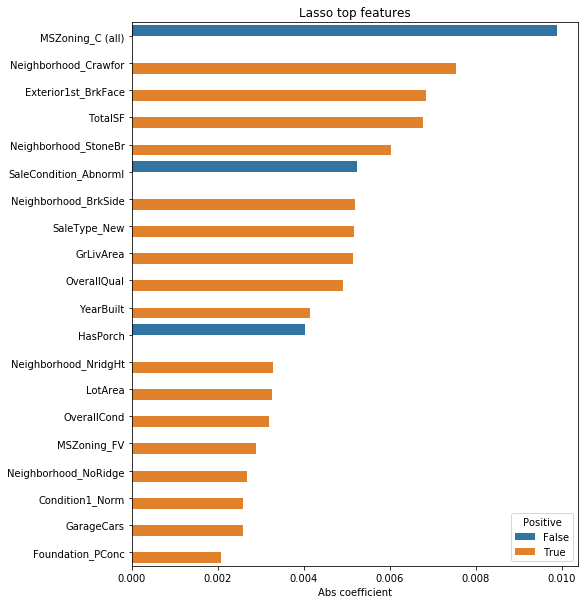

In [185]:
import seaborn as sns
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_>0},index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('Lasso dropped {} of {} features'.format(sum(coefs.coefs == 0), coefs.shape[0]))
top_coefs = coefs.sort_values('coefs_abs',ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot(top_coefs.coefs_abs,top_coefs.index,orient='h',hue=top_coefs.Positive)
plt.title("Lasso top features")
plt.xlabel('Abs coefficient')
plt.show()



In [187]:
#Applying ML library XGBoost
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2, 
                        gamma=0,
                        learning_rate=0.05,
                        max_depth=6,
                        min_child_weight=1.5,
                        n_estimators=7200,
                        reg_alpha=0.9,
                        reg_lambda=0.6,
                        subsample=0.2,
                        seed=42,
                        silent=0)
regr.fit(X_train[top_coefs.index],y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
             silent=0, subsample=0.2, verbosity=1)

In [190]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
  return np.sqrt(mean_squared_error(y_test,y_pred))
y_pred = regr.predict(X_test[top_coefs.index])
print('XGBoost score on training set: ', rmse(y_test,y_pred))

XGBoost score on training set:  0.014481939734533954
